In [1]:
#disease prediction model by using SVC, random forest,Naive bayes by ensemble technique


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode 
#The mode function is used to find the most frequent value(s) in an array or dataset.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
#LabelEncoder converts categorical data (e.g., strings or labels) into numerical format
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.svm import SVC 
#SVC (Support Vector Classifier) is a machine learning algorithm used for classification tasks.
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("disease_training.csv")
data = data.drop(columns = ["Unnamed: 133"])
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [3]:
# Checking whether the dataset is balanced or not in the prognosis column
disease_counts  = data["prognosis"].value_counts()
x = pd.DataFrame({"Disease":disease_counts.index,"counts":disease_counts.values})
x

,Disease,counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


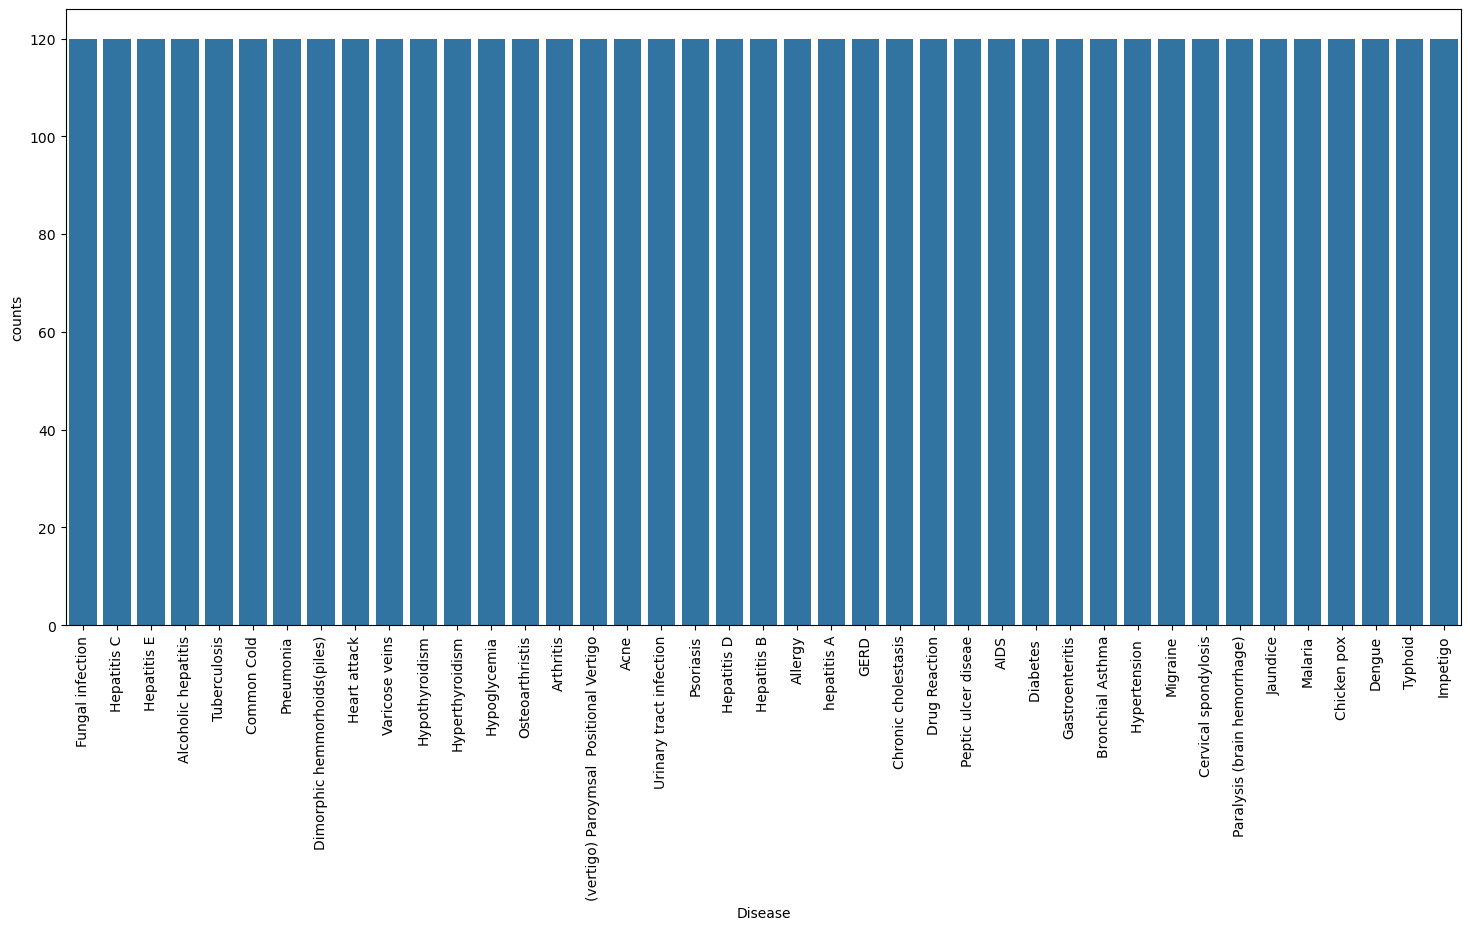

In [4]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'Disease',y = 'counts',data = x)
plt.xticks(rotation = 90)
plt.show()

from the above plot we can observe that our target column is balanced but we cant proceed 
with this data points so we will do data encoding

In [5]:
#we have two method to do data encoding

encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
data
# data.dtypes
#  for i in data.dtypes[data.dtypes == 'object'].index:
#      y = data.pop(i)
#      dummies = pd.get_dummies(y,prefix = i).astype(int)
#      data1 = pd.DataFrame(dummies)
# data1

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 42)
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [7]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


# cross validation
# Support Vector Classifier is a discriminative classifier i.e. when given a labeled training data, the algorithm tries to find an optimal hyperplane that accurately separates the samples into different categories in hyperspace.
# Gaussian Naive Bayes Classifier: It is a probabilistic machine learning algorithm that internally uses Bayes Theorem to classify the data points.
#  In a random forest classifier, all the internal decision trees are weak learners, and the outputs of these weak decision trees are combined i.e. mode of all the predictions is as the final prediction.

In [8]:
models = {
"SVC": SVC(),
"Gaussian NB":GaussianNB(),
"Random Forest":RandomForestClassifier(random_state = 42),
"Xg_boost" : GradientBoostingClassifier()
}
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model,X_train,y_train,cv = 10,n_jobs = -1,scoring = 'accuracy')

    print("=="*30)
    print(model_name)
    print(f"score:{scores}")
    print(f"Mean Score: {scores.mean()}")

SVC
score:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
score:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
score:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Xg_boost
score:[1.         1.         1.         1.         1.         1.
 1.         0.99745547 1.         1.        ]
Mean Score: 0.9997455470737913


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


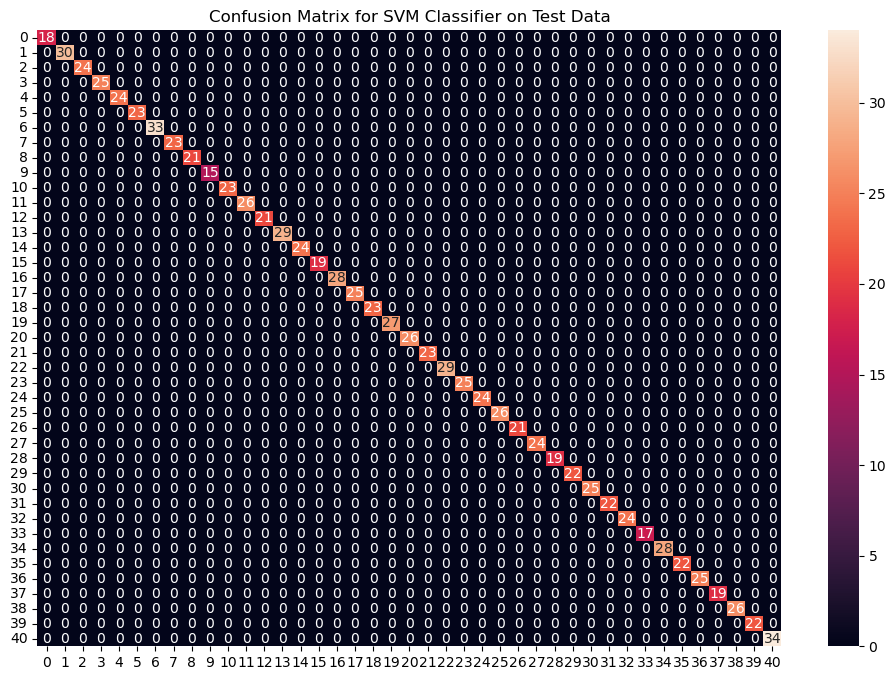

In [9]:
# training and testingSVM classifiers
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
cf_matrix
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

In [10]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier()
final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)
test_data = pd.read_csv('disease_Training.csv')

In [11]:
test_data = test_data.drop(columns = ['Unnamed: 133'])
test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [12]:
# for i in test_data.dtypes[ test_data.dtypes == 'object'].index:
#     y = test_data.pop(i)
#     dummies = pd.get_dummies(y,prefix = i).astype(int)
#     test_data  = pd.concat([test_data,dummies],axis = 1)
# test_data

In [13]:
test_x = test_data.iloc[:,:-1]
test_y = encoder.transform(test_data.iloc[:,-1])
svm_preds = final_svm_model.predict(test_x)
nb_preds = final_nb_model.predict(test_x)
rf_preds = final_rf_model.predict(test_x)

In [14]:
from scipy import stats # to use the mode
final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds,nb_preds,rf_preds)]
final_preds

[15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,


In [15]:
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_y, final_preds)*100}")

Accuracy on Test dataset by the combined model: 100.0


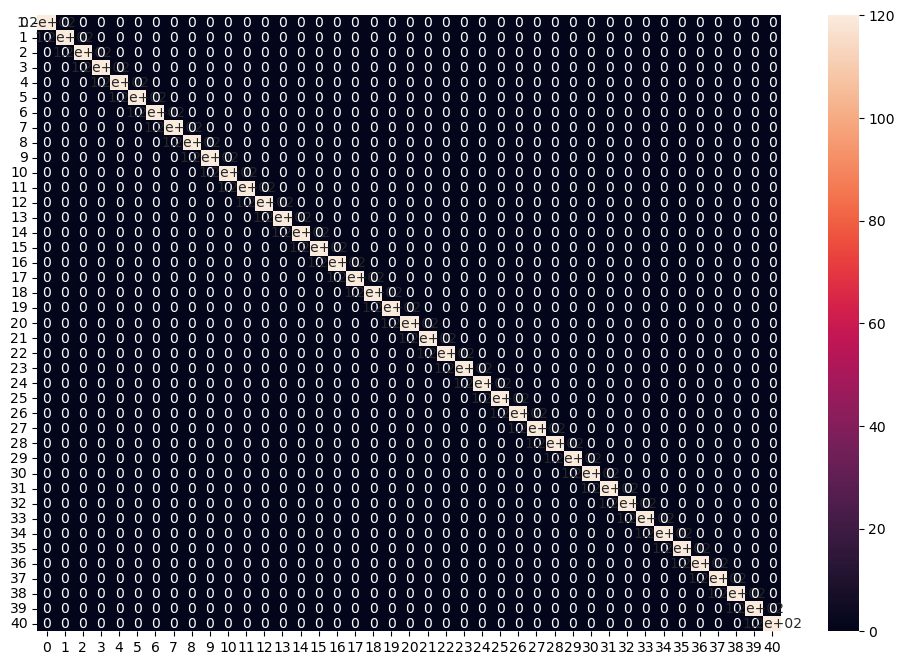

In [16]:
cf_matrix = confusion_matrix(test_y,final_preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix,annot = True)
plt.show()

# Creating a function that can take symptoms as input and generate predictions for disease 

In [19]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

# This code is modified by Susobhan Akhuli



{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\vardm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\vardm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\vardm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions,Chills"))

# This code is modified by Susobhan Akhuli


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\vardm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\vardm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\vardm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
